In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date

sys.path.append('../')

from util.chart_methods import draw_investment_log
from util.math_methods import round_down

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
portfolio_name = 'test'
total_policies = 6
df_list = []
for policy_id in range(0, total_policies):
    df = pd.read_csv('../logs/{0}-{1}.log'.format(portfolio_name, policy_id), parse_dates=['date'], date_parser=pd.to_datetime)
    df_list.append(df)

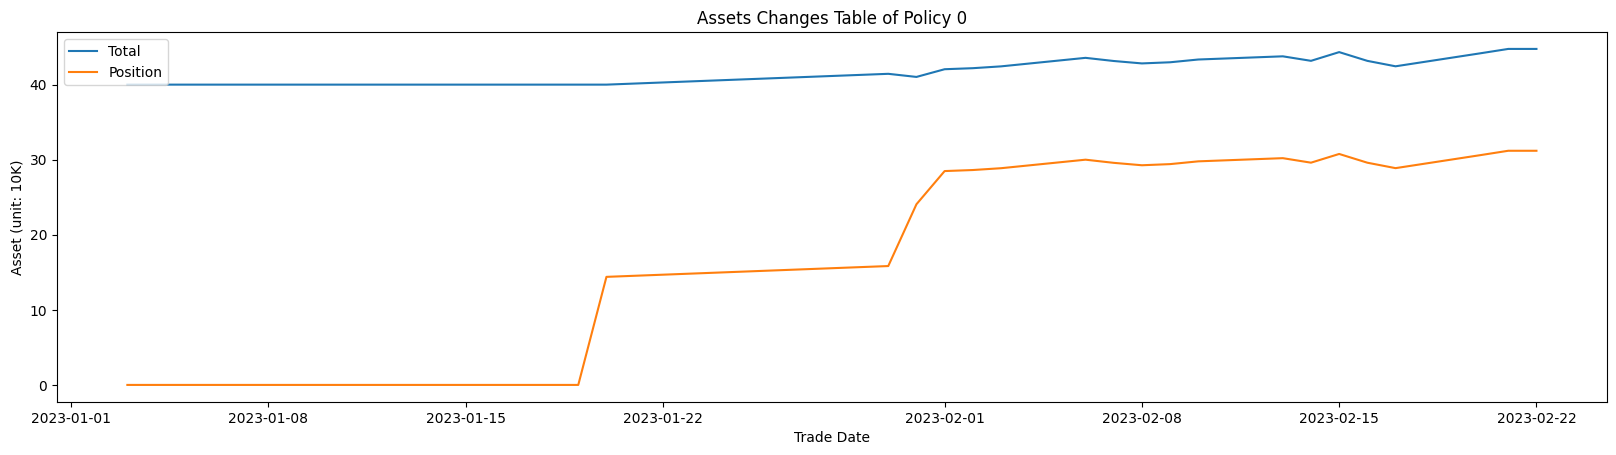

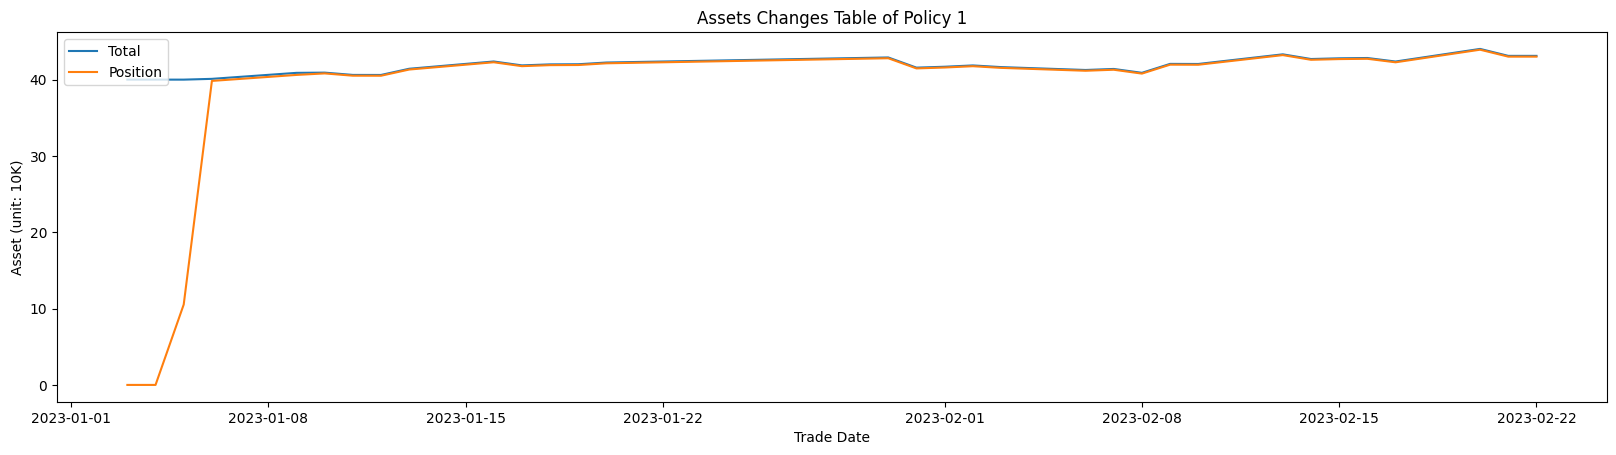

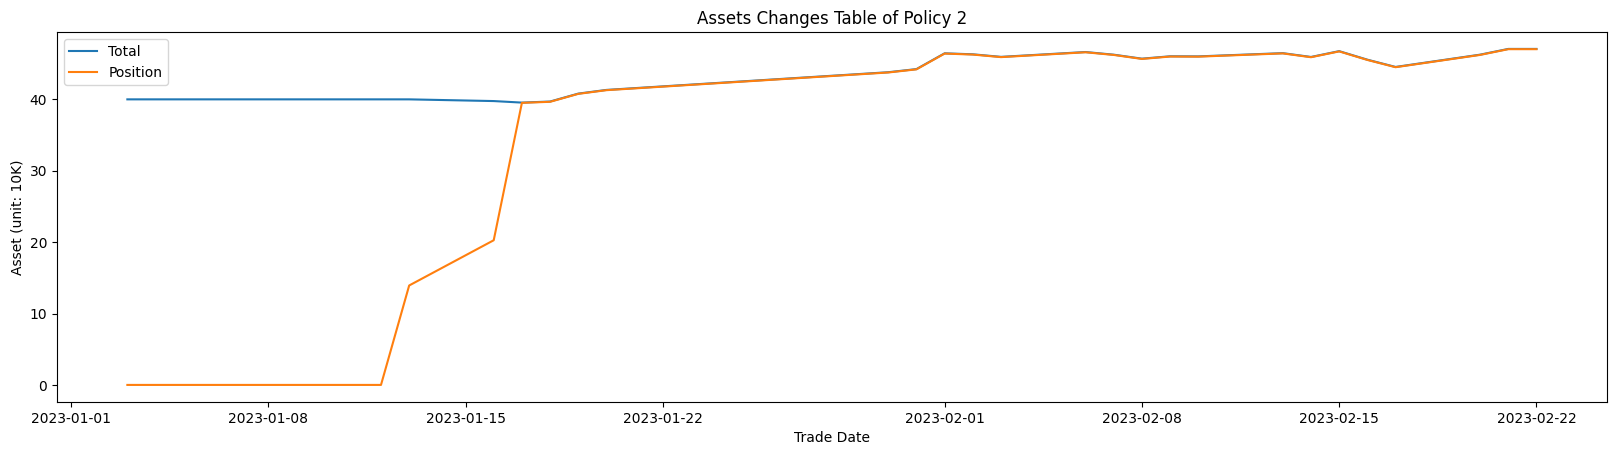

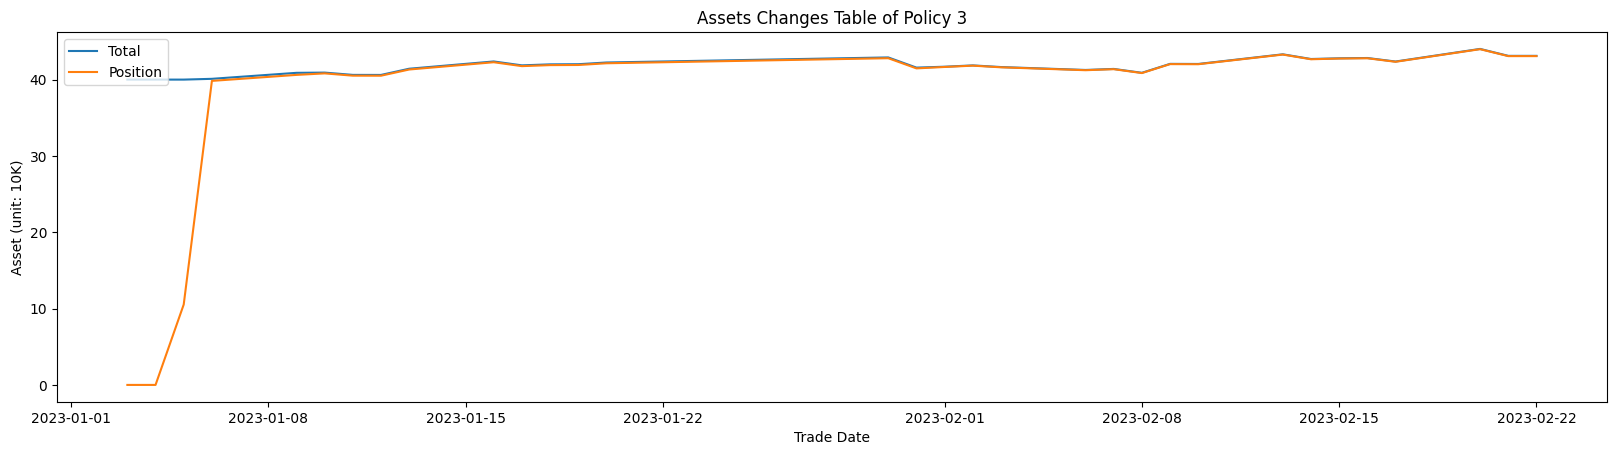

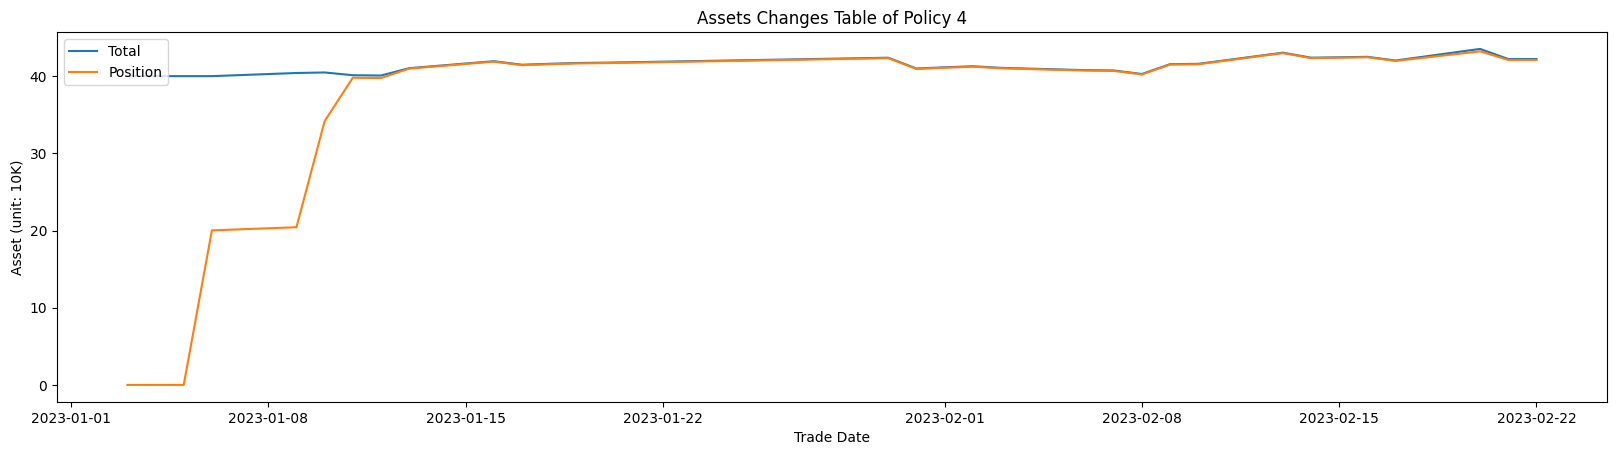

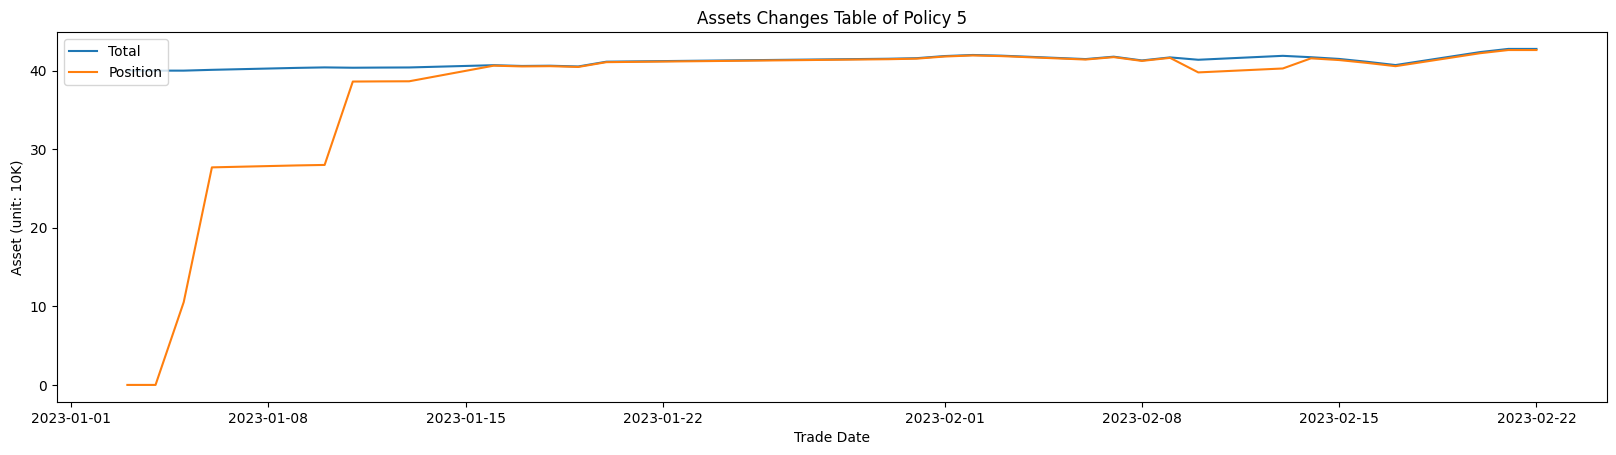

In [3]:
for policy_id in range(0, total_policies):
    draw_investment_log(df_list[policy_id], xlabel='Trade Date', ylabel='Asset (unit: 10K)', title='Assets Changes Table of Policy ' + str(policy_id))

In [4]:
def print_cagr(df):
    start_date = date.fromtimestamp(df.date.values[0].astype(int) / 1e9)
    end_date = date.fromtimestamp(df.date.values[-1].astype(int) / 1e9)
    years = end_date.year - start_date.year if end_date.year > start_date.year else 1
    initial_total = df.total.values[0]
    total = df.total.values[-1]
    cagr = round_down((total / initial_total) ** (1 / years) - 1)
    print('CAGR: {0}'.format(cagr))

for policy_id in range(0, total_policies):
    print_cagr(df_list[policy_id])

CAGR: 0.11
CAGR: 0.07
CAGR: 0.17
CAGR: 0.07
CAGR: 0.05
CAGR: 0.06


In [5]:
df_trade_list = []
for policy_id in range(0, total_policies):
    df_trade = pd.read_csv('../logs/trade_{0}-{1}.log'.format(portfolio_name, policy_id), parse_dates=['date','hold_date'], date_parser=pd.to_datetime)
    df_trade_list.append(df_trade)

In [6]:
def get_win_loss(policy_id):
    df_trade = df_trade_list[policy_id]
    return df_trade[['ts_code','status']].groupby(['status']).count().rename(columns={"ts_code": "policy_{0}_count".format(policy_id)})

df_win_loss = get_win_loss(0)
for policy_id in range(1, total_policies):
    df_win_loss = df_win_loss.join(get_win_loss(policy_id))

df_win_loss

,policy_0_count,policy_1_count,policy_2_count,policy_3_count,policy_4_count,policy_5_count
status,,,,,,
holding,3,5,4,6,5,5


In [7]:
def get_stock_benefit(policy_id):
    df_trade = df_trade_list[policy_id]
    df_benefit = df_trade[['ts_code', 'benefit']].groupby(['ts_code']).sum(['benefit']).rename(columns={"benefit": "sum_{0}".format(policy_id)})
    df_win = df_trade[df_trade['status']=='win']
    df_win_sum = df_win[['ts_code', 'benefit']].groupby(['ts_code']).sum(['benefit']).rename(columns={"benefit": "win_{0}".format(policy_id)})
    df_win_count = df_win[['ts_code', 'benefit']].groupby(['ts_code']).count().rename(columns={"benefit": "w_cnt_{0}".format(policy_id)})
    df_loss = df_trade[df_trade['status']=='loss']
    df_loss_sum = df_loss[['ts_code', 'benefit']].groupby(['ts_code']).sum(['benefit']).rename(columns={"benefit": "loss_{0}".format(policy_id)})
    df_loss_count = df_loss[['ts_code', 'benefit']].groupby(['ts_code']).count().rename(columns={"benefit": "l_cnt_{0}".format(policy_id)})
    df_benefit = df_benefit.join(df_win_sum).join(df_loss_sum).join(df_win_count).join(df_loss_count)
    return df_benefit

In [8]:
df_benefit = get_stock_benefit(0)
for policy_id in range(1, total_policies):
    df_benefit = pd.merge(df_benefit, get_stock_benefit(policy_id), on='ts_code', how='outer')

df_benefit.sort_values(by=['sum_0'], ascending=False)

,sum_0,win_0,loss_0,w_cnt_0,l_cnt_0,sum_1,win_1,loss_1,w_cnt_1,l_cnt_1,sum_2,win_2,loss_2,w_cnt_2,l_cnt_2,sum_3,win_3,loss_3,w_cnt_3,l_cnt_3,sum_4,win_4,loss_4,w_cnt_4,l_cnt_4,sum_5,win_5,loss_5,w_cnt_5,l_cnt_5
ts_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
002230.SZ,48564.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53060.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600418.SH,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13600.0,NaN,NaN,NaN,NaN
600733.SH,-1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-26.0,NaN,NaN,NaN,NaN,-120.00,NaN,-120.0,NaN,1.0,-750.0,NaN,NaN,NaN,NaN
000568.SZ,NaN,NaN,NaN,NaN,NaN,7944.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7944.0,NaN,NaN,NaN,NaN,7944.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000651.SZ,NaN,NaN,NaN,NaN,NaN,3876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,NaN
000858.SZ,NaN,NaN,NaN,NaN,NaN,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13734.0,NaN,NaN,NaN,NaN,10388.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600031.SH,NaN,NaN,NaN,NaN,NaN,238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,736.0,NaN,NaN,NaN,NaN
603444.SH,NaN,NaN,NaN,NaN,NaN,5343.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5343.0,NaN,NaN,NaN,NaN,4323.00,NaN,NaN,NaN,NaN,5343.0,NaN,NaN,NaN,NaN
000625.SZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_trade_list[5].tail(60)

,date,ts_code,hold_shares,hold_date,buy_price,sell_price,total_cash_return,benefit,reason,status
0,2023-02-10,600763.SH,100.0,2023-01-16,169.98,155.01,0.0,-1497.0,stop loss point,loss
1,2023-02-22,603444.SH,300.0,2023-01-05,351.20,369.01,0.0,5343.0,NaN,holding
2,2023-02-22,000651.SZ,5000.0,2023-01-06,34.10,36.14,0.0,10200.0,NaN,holding
3,2023-02-22,600733.SH,5000.0,2023-01-11,6.68,6.53,0.0,-750.0,NaN,holding
4,2023-02-22,600418.SH,5000.0,2023-01-11,14.63,17.35,0.0,13600.0,NaN,holding
5,2023-02-22,600031.SH,800.0,2023-02-14,18.34,19.26,0.0,736.0,NaN,holding
